<a href="https://colab.research.google.com/github/theanhak1/Employee-Manager-Group-1/blob/Train/Train_MMPose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMPose Tutorial

Welcome to MMPose colab tutorial! In this tutorial, we will show you how to

- install MMPose 1.x
- perform inference with an MMPose model
- train a new mmpose model with your own datasets

Let's start!

## Install MMPose

We recommend to use a conda environment to install mmpose and its dependencies. And compilers `nvcc` and `gcc` are required.

In [1]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/usr/local/bin/python


In [2]:
# install dependencies: (if your colab has CUDA 11.8)
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
# install MMEngine, MMCV and MMDetection using MIM
%pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"
!mim install "mmdet>=3.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 31.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 22.1 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 MB 4.2 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00


In [4]:
# for better Colab compatibility, install xtcocotools from source
%pip install git+https://github.com/jin-s13/xtcocoapi

  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-req-build-6r1w8gsc
  Running command git clone --filter=blob:none --quiet https://github.com/jin-s13/xtcocoapi /tmp/pip-req-build-6r1w8gsc
  Resolved https://github.com/jin-s13/xtcocoapi to commit d74033ff1635e9002133b2380862bc2b728584d2
  Preparing metadata (setup.py) ... done
  Created wheel for xtcocotools: filename=xtcocotools-1.14.3-cp310-cp310-linux_x86_64.whl size=379752 sha256=f6398c1c3a1af6137c1793a7aff8401d6381b817b45e77f2fc46830bb657a960
  Stored in directory: /tmp/pip-ephem-wheel-cache-55puhsp5/wheels/ef/1b/6b/bca3cf15bb2e536384aa0cff349cfe87a1450847473b241cf0
Successfully built xtcocotools


In [5]:
!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x
%cd mmpose
%pip install -r requirements.txt
%pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

Cloning into 'mmpose'...
remote: Enumerating objects: 30872, done.
remote: Counting objects: 100% (1653/1653), done.
remote: Compressing objects: 100% (815/815), done.
remote: Total 30872 (delta 905), reused 1368 (delta 814), pack-reused 29219
Receiving objects: 100% (30872/30872), 53.21 MiB | 36.35 MiB/s, done.
Resolving deltas: 100% (21710/21710), done.
/content/mmpose
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 937.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.0/234.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/146.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [6]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 2.1.0+cu121 True
torchvision version: 0.16.0+cu121
mmpose version: 1.3.1
cuda version: 12.1
compiler information: GCC 9.3


## Inference with an MMPose model

MMPose provides high-level APIs for model inference and training.

In [9]:
import mmcv
from mmcv import imread
import mmengine
from mmengine.registry import init_default_scope
import numpy as np

from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator
from mmpose.evaluation.functional import nms
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

try:
    from mmdet.apis import inference_detector, init_detector
    has_mmdet = True
except (ImportError, ModuleNotFoundError):
    has_mmdet = False

local_runtime = False

try:
    from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
    local_runtime = True

img = '/content/mmpose/tests/data/coco/000000197388.jpg'
pose_config = '/content/mmpose/configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

device = 'cpu'
cfg_options = dict(model=dict(test_cfg=dict(output_heatmaps=True)))


# build detector
detector = init_detector(
    det_config,
    det_checkpoint,
    device=device
)


# build pose estimator
pose_estimator = init_pose_estimator(
    pose_config,
    pose_checkpoint,
    device=device,
    cfg_options=cfg_options
)

# init visualizer
pose_estimator.cfg.visualizer.radius = 3
pose_estimator.cfg.visualizer.line_width = 1
visualizer = VISUALIZERS.build(pose_estimator.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_pose_estimator
visualizer.set_dataset_meta(pose_estimator.dataset_meta)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32_coco_256x192-c78dce93_20200708.pth


In [10]:

def visualize_img(img_path, detector, pose_estimator, visualizer,
                  show_interval, out_file):
    """Visualize predicted keypoints (and heatmaps) of one image."""

    # predict bbox
    scope = detector.cfg.get('default_scope', 'mmdet')
    if scope is not None:
        init_default_scope(scope)
    detect_result = inference_detector(detector, img_path)
    pred_instance = detect_result.pred_instances.cpu().numpy()
    bboxes = np.concatenate(
        (pred_instance.bboxes, pred_instance.scores[:, None]), axis=1)
    bboxes = bboxes[np.logical_and(pred_instance.labels == 0,
                                   pred_instance.scores > 0.3)]
    bboxes = bboxes[nms(bboxes, 0.3)][:, :4]

    # predict keypoints
    pose_results = inference_topdown(pose_estimator, img_path, bboxes)
    data_samples = merge_data_samples(pose_results)

    # show the results
    img = mmcv.imread(img_path, channel_order='rgb')

    visualizer.add_datasample(
        'result',
        img,
        data_sample=data_samples,
        draw_gt=False,
        draw_heatmap=True,
        draw_bbox=True,
        show=False,
        wait_time=show_interval,
        out_file=out_file,
        kpt_thr=0.3)

In [11]:
visualize_img(
    img,
    detector,
    pose_estimator,
    visualizer,
    show_interval=0,
    out_file=None)

vis_result = visualizer.get_image()

02/18 01:52:32 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
02/18 01:52:42 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".


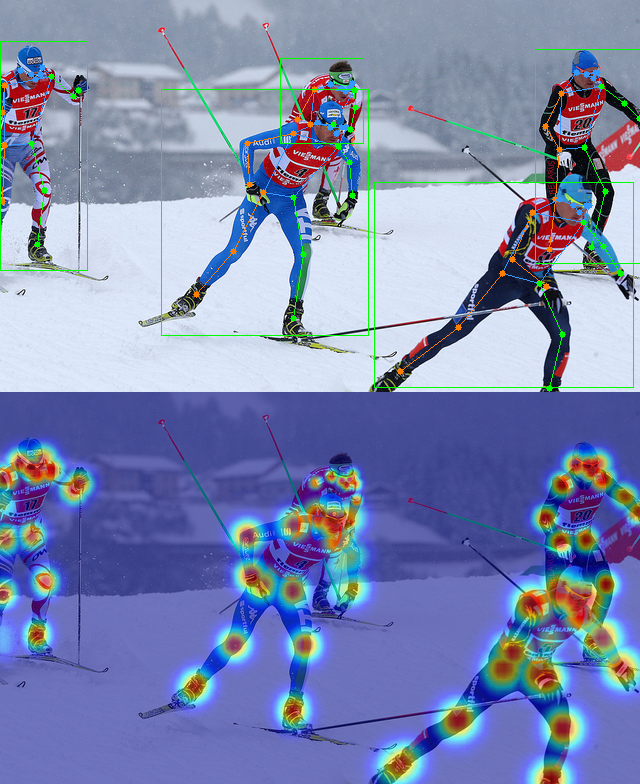

In [12]:
if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    import cv2
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result[:,:,::-1])
        display(Image(file_name))
else:
    cv2_imshow(vis_result[:,:,::-1]) #RGB2BGR to fit cv2

### Add a new dataset

There are two methods to support a customized dataset in MMPose. The first one is to convert the data to a supported format (e.g. COCO) and use the corresponding dataset class (e.g. BaseCocoStyleDataset), as described in the [document](https://mmpose.readthedocs.io/en/1.x/user_guides/prepare_datasets.html). The second one is to add a new dataset class. In this tutorial, we give an example of the second method.

We first download the demo dataset, which contains 100 samples (75 for training and 25 for validation) selected from COCO train2017 dataset. The annotations are stored in a different format from the original COCO format.


In [13]:
# download dataset
%mkdir data
%cd data
!wget https://download.openmmlab.com/mmpose/datasets/coco_tiny.tar
!tar -xf coco_tiny.tar
%cd ..

/content/mmpose/data
--2024-02-18 01:52:54--  https://download.openmmlab.com/mmpose/datasets/coco_tiny.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.66.107, 163.181.66.104, 163.181.66.106, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.66.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16558080 (16M) [application/x-tar]
Saving to: ‘coco_tiny.tar’

coco_tiny.tar       100%[===================>]  15.79M  6.84MB/s    in 2.3s    

2024-02-18 01:52:57 (6.84 MB/s) - ‘coco_tiny.tar’ saved [16558080/16558080]

/content/mmpose


In [14]:
# check the directory structure
!apt-get -q install tree
!tree data/coco_tiny

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (102 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
data/coco_tiny
├── images
│   ├── 000000012754.jpg
│   ├── 000000017741.jpg
│   ├── 000000019157.jpg
│   ├── 000000019523.jpg
│   ├── 000000019608.jpg
│   ├── 000000022816.jpg
│   ├── 000000031092.jpg
│   ├── 000000032124.jpg
│   ├── 000000037209.jpg
│   ├── 000000050713.jpg
│   ├── 000000057703.jpg
│ 

In [15]:
# check the annotation format
import json
import pprint

anns = json.load(open('/content/mmpose/data/coco_tiny/train.json'))

print(type(anns), len(anns))
pprint.pprint(anns[0], compact=True)

<class 'list'> 75
{'bbox': [267.03, 104.32, 229.19, 320],
 'image_file': '000000537548.jpg',
 'image_size': [640, 480],
 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 325, 160, 2, 398,
               177, 2, 0, 0, 0, 437, 238, 2, 0, 0, 0, 477, 270, 2, 287, 255, 1,
               339, 267, 2, 0, 0, 0, 423, 314, 2, 0, 0, 0, 355, 367, 2]}


After downloading the data, we implement a new dataset class to load data samples for model training and validation. Assume that we are going to train a top-down pose estimation model, the new dataset class inherits `BaseCocoStyleDataset`.

We have already implemented a `CocoDataset` so that we can take it as an example.

#### Note
If you meet the following error:
```shell
AssertionError: class `PoseLocalVisualizer` in mmpose/visualization/local_visualizer.py: <class 'mmpose.visualization.local_visualizer.PoseLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not access any other arguments
```
Please reboot your jupyter kernel and start running from here.

In [16]:
%cd mmpose

/content/mmpose/mmpose


In [17]:
# Copyright (c) OpenMMLab. All rights reserved.
import json
import os.path as osp
from typing import Callable, List, Optional, Sequence, Union

import numpy as np
from mmengine.utils import check_file_exist

from mmpose.registry import DATASETS
from mmpose.datasets.datasets.base import BaseCocoStyleDataset


@DATASETS.register_module()
class TinyCocoDataset(BaseCocoStyleDataset):
    METAINFO: dict = dict(from_file='/content/mmpose/configs/_base_/datasets/coco.py')

    def _load_annotations(self) -> List[dict]:
        """Load data from annotations in MPII format."""

        check_file_exist(self.ann_file)
        with open(self.ann_file) as anno_file:
            anns = json.load(anno_file)

        data_list = []
        ann_id = 0

        for idx, ann in enumerate(anns):
            img_h, img_w = ann['image_size']

            # get bbox in shape [1, 4], formatted as xywh
            x, y, w, h = ann['bbox']
            x1 = np.clip(x, 0, img_w - 1)
            y1 = np.clip(y, 0, img_h - 1)
            x2 = np.clip(x + w, 0, img_w - 1)
            y2 = np.clip(y + h, 0, img_h - 1)

            bbox = np.array([x1, y1, x2, y2], dtype=np.float32).reshape(1, 4)

            # load keypoints in shape [1, K, 2] and keypoints_visible in [1, K]
            joints_3d = np.array(ann['keypoints']).reshape(1, -1, 3)
            num_joints = joints_3d.shape[1]
            keypoints = np.zeros((1, num_joints, 2), dtype=np.float32)
            keypoints[:, :, :2] = joints_3d[:, :, :2]
            keypoints_visible = np.minimum(1, joints_3d[:, :, 2:3])
            keypoints_visible = keypoints_visible.reshape(1, -1)

            data_info = {
                'id': ann_id,
                'img_id': int(ann['image_file'].split('.')[0]),
                'img_path': osp.join(self.data_prefix['img'], ann['image_file']),
                'bbox': bbox,
                'bbox_score': np.ones(1, dtype=np.float32),
                'keypoints': keypoints,
                'keypoints_visible': keypoints_visible,
            }

            data_list.append(data_info)
            ann_id = ann_id + 1

        return data_list, None


### Create a config file

In the next step, we create a config file which configures the model, dataset and runtime settings. More information can be found at [Configs](https://mmpose.readthedocs.io/en/1.x/user_guides/configs.html). A common practice to create a config file is deriving from a existing one. In this tutorial, we load a config file that trains a HRNet on COCO dataset, and modify it to adapt to the COCOTiny dataset.

In [18]:
from mmengine import Config

cfg = Config.fromfile(
    '/content/mmpose/configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192.py'
)

# set basic configs
cfg.data_root = '/content/mmpose/data/coco_tiny'
cfg.work_dir = '/content/mmpose/mmpose/work_dirs/hrnet_w32_coco_tiny_256x192'
cfg.randomness = dict(seed=0)

# set log interval
cfg.train_cfg.val_interval = 1

# set num of epoch
cfg.train_cfg.max_epochs = 40

# set optimizer
cfg.optim_wrapper = dict(optimizer=dict(
    type='Adam',
    lr=5e-4,
))

# set learning rate policy
cfg.param_scheduler = [
    dict(
        type='LinearLR', begin=0, end=10, start_factor=0.001,
        by_epoch=False),  # warm-up
    dict(
        type='MultiStepLR',
        begin=0,
        end=cfg.train_cfg.max_epochs,
        milestones=[17, 35],
        gamma=0.1,
        by_epoch=True)
]


# set batch size
cfg.train_dataloader.batch_size = 16
cfg.val_dataloader.batch_size = 16
cfg.test_dataloader.batch_size = 16

# set dataset configs
cfg.dataset_type = 'TinyCocoDataset'
cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.ann_file = 'train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img='images/')


cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.bbox_file = None
cfg.val_dataloader.dataset.ann_file = 'val.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img='images/')

cfg.test_dataloader.dataset.type = cfg.dataset_type
cfg.test_dataloader.dataset.bbox_file = None
cfg.test_dataloader.dataset.ann_file = 'val.json'
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix = dict(img='images/')

# set evaluator
cfg.val_evaluator = dict(type='PCKAccuracy')
cfg.test_evaluator = cfg.val_evaluator

cfg.default_hooks.checkpoint.save_best = 'PCK'
cfg.default_hooks.checkpoint.max_keep_ckpts = 1

print(cfg.pretty_text)


auto_scale_lr = dict(base_batch_size=512)
backend_args = dict(backend='local')
codec = dict(
    heatmap_size=(
        48,
        64,
    ),
    input_size=(
        192,
        256,
    ),
    sigma=2,
    type='MSRAHeatmap')
custom_hooks = [
    dict(type='SyncBuffersHook'),
]
data_mode = 'topdown'
data_root = '/content/mmpose/data/coco_tiny'
dataset_type = 'TinyCocoDataset'
default_hooks = dict(
    badcase=dict(
        badcase_thr=5,
        enable=False,
        metric_type='loss',
        out_dir='badcase',
        type='BadCaseAnalysisHook'),
    checkpoint=dict(
        interval=10,
        max_keep_ckpts=1,
        rule='greater',
        save_best='PCK',
        type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(enable=False, type='PoseVisualizationHook'))
default_scope = 'mmpose'
env_cfg

or you can create a config file like follows:
```Python3
_base_ = ['../../../_base_/default_runtime.py']

# runtime
train_cfg = dict(max_epochs=40, val_interval=1)

# optimizer
optim_wrapper = dict(optimizer=dict(
    type='Adam',
    lr=5e-4,
))

# learning policy
param_scheduler = [
    dict(
        type='LinearLR', begin=0, end=500, start_factor=0.001,
        by_epoch=False),  # warm-up
    dict(
        type='MultiStepLR',
        begin=0,
        end=train_cfg.max_epochs,
        milestones=[17, 35],
        gamma=0.1,
        by_epoch=True)
]

# automatically scaling LR based on the actual training batch size
auto_scale_lr = dict(base_batch_size=512)

# codec settings
codec = dict(
    type='MSRAHeatmap', input_size=(192, 256), heatmap_size=(48, 64), sigma=2)

# model settings
model = dict(
    type='TopdownPoseEstimator',
    data_preprocessor=dict(
        type='PoseDataPreprocessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True),
    backbone=dict(
        type='HRNet',
        in_channels=3,
        extra=dict(
            stage1=dict(
                num_modules=1,
                num_branches=1,
                block='BOTTLENECK',
                num_blocks=(4, ),
                num_channels=(64, )),
            stage2=dict(
                num_modules=1,
                num_branches=2,
                block='BASIC',
                num_blocks=(4, 4),
                num_channels=(32, 64)),
            stage3=dict(
                num_modules=4,
                num_branches=3,
                block='BASIC',
                num_blocks=(4, 4, 4),
                num_channels=(32, 64, 128)),
            stage4=dict(
                num_modules=3,
                num_branches=4,
                block='BASIC',
                num_blocks=(4, 4, 4, 4),
                num_channels=(32, 64, 128, 256))),
        init_cfg=dict(
            type='Pretrained',
            checkpoint='https://download.openmmlab.com/mmpose/'
            'pretrain_models/hrnet_w32-36af842e.pth'),
    ),
    head=dict(
        type='HeatmapHead',
        in_channels=32,
        out_channels=17,
        deconv_out_channels=None,
        loss=dict(type='KeypointMSELoss', use_target_weight=True),
        decoder=codec),
    test_cfg=dict(
        flip_test=True,
        flip_mode='heatmap',
        shift_heatmap=True,
    ))

# base dataset settings
dataset_type = 'TinyCocoDataset'
data_mode = 'topdown'
data_root = 'data/coco_tiny'
work_dir = 'work_dirs/hrnet_w32_coco_tiny_256x192'
randomness = dict(seed=0)

# pipelines
train_pipeline = [
    dict(type='LoadImage'),
    dict(type='GetBBoxCenterScale'),
    dict(type='RandomFlip', direction='horizontal'),
    dict(type='RandomHalfBody'),
    dict(type='RandomBBoxTransform'),
    dict(type='TopdownAffine', input_size=codec['input_size']),
    dict(type='GenerateTarget', target_type='heatmap', encoder=codec),
    dict(type='PackPoseInputs')
]
test_pipeline = [
    dict(type='LoadImage'),
    dict(type='GetBBoxCenterScale'),
    dict(type='TopdownAffine', input_size=codec['input_size']),
    dict(type='PackPoseInputs')
]

# data loaders
train_dataloader = dict(
    batch_size=16,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_mode=data_mode,
        ann_file='train.json',
        data_prefix=dict(img='images/'),
        pipeline=train_pipeline,
    ))
val_dataloader = dict(
    batch_size=16,
    num_workers=2,
    persistent_workers=True,
    drop_last=False,
    sampler=dict(type='DefaultSampler', shuffle=False, round_up=False),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_mode=data_mode,
        ann_file='val.json',
        data_prefix=dict(img='images/'),
        test_mode=True,
        pipeline=test_pipeline,
    ))
test_dataloader = val_dataloader

# evaluators
val_evaluator = dict(
    type='PCKAccuracy')
test_evaluator = val_evaluator

# hooks
default_hooks = dict(checkpoint=dict(save_best='coco/AP', rule='greater'))
```

### Train and Evaluation


In [ ]:
from mmengine.config import Config, DictAction
from mmengine.runner import Runner

# set preprocess configs to model
cfg.model.setdefault('data_preprocessor', cfg.get('preprocess_cfg', {}))

# build the runner from config
runner = Runner.from_cfg(cfg)

# start training
runner.train()

02/16 08:28:09 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 0
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=12.1, CUDNN_VERSION=8.9.2, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=1

Downloading: "https://download.openmmlab.com/mmpose/pretrain_models/hrnet_w32-36af842e.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32-36af842e.pth


02/16 08:28:43 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: head.0.0.0.conv1.weight, head.0.0.0.bn1.weight, head.0.0.0.bn1.bias, head.0.0.0.bn1.running_mean, head.0.0.0.bn1.running_var, head.0.0.0.bn1.num_batches_tracked, head.0.0.0.conv2.weight, head.0.0.0.bn2.weight, head.0.0.0.bn2.bias, head.0.0.0.bn2.running_mean, head.0.0.0.bn2.running_var, head.0.0.0.bn2.num_batches_tracked, head.0.0.0.conv3.weight, head.0.0.0.bn3.weight, head.0.0.0.bn3.bias, head.0.0.0.bn3.running_mean, head.0.0.0.bn3.running_var, head.0.0.0.bn3.num_batches_tracked, head.0.0.0.downsample.0.weight, head.0.0.0.downsample.1.weight, head.0.0.0.downsample.1.bias, head.0.0.0.downsample.1.running_mean, head.0.0.0.downsample.1.running_var, head.0.0.0.downsample.1.num_batches_tracked, head.0.1.0.conv1.weight, head.0.1.0.bn1.weight, head.0.1.0.bn1.bias, head.0.1.0.bn1.running_mean, head.0.1.0.bn1.running_var, head.0.1.0.bn1.num_batches_tracked, head.0.1.

TopdownPoseEstimator(
  (data_preprocessor): PoseDataPreprocessor()
  (backbone): HRNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm

#### Note
The recommended best practice is to convert your customized data into COCO format.